# Top 500 Revije Rolling Stone



In [228]:
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_rows = 20
%matplotlib inline

V svoji nalogi bom analizirala top 500 skladb vseh časov po mnenju revije Rolling Stone, ki velja za eno najpomembnejših v svetu glasbene industrije. Za vsako skladbo sem pridobila podatke o mestu na lestvici, izvajalcu, naslovu, avtorju, producentu,zalozbi in letu izdaje. Prav tako pa tudi najvišje mesto na katerega je bila skladba uvrščena na ameriški glasbeni lestvici Billboard ter koliko tednov je bilo skupno na lestici ter tudi album na katerem je skladba izšla. Vse te podatke sem shranila v tabelo skladbe, ki je tudi prikazana spodaj. Kot vidimo sta tako avtor kot producent podana v obliki seznama, saj jih je večinoma več, zato sem te podatke shranila v dve ločeni tabeli avtorji in producenti. 
Naj še omenim, da so prvotno lestvico izdali leta 2004, leta 2010 pa so naredili nekaj minimalnh popravkov. 

In [4]:
skladbe = pd.read_csv('obdelani-podatki/skladbe.csv')
producenti = pd.read_csv('obdelani-podatki/producenti.csv')
avtorji = pd.read_csv('obdelani-podatki/avtorji.csv')
skladbe2 = skladbe[['izvajalec', 'leto',"zalozba","tedni","mesto"]]

In [215]:
skladbe.tail(5).sort_values("id", ascending = True) 

,id,izvajalec,naslov,avtor,producent,leto,zalozba,tedni,mesto,album
499,1,Bob Dylan,Like a Rolling Stone,['Dylan'],['Tom Wilson '],1965,Columbia,12.0,2.0,Bob Dylan at 70
498,2,The Rolling Stones,(I Can't Get No) Satisfaction,"[' Mick Jagger', 'Keith Richards']",['Andrew Loog Oldham'],1965,London,14.0,1.0,Out of Our Heads
497,3,John Lennon,Imagine,['John Lennon'],"['Lennon', 'Phil Spector', 'Yoko Ono']",1971,Apple,9.0,3.0,Imagine
496,4,Marvin Gaye,What's Going On,"['Gaye', 'Renaldo Benson', 'Al Cleveland']",['Gaye '],1971,Tamla,13.0,2.0,What's Going On
495,5,Aretha Franklin,Respect,['Otis Redding'],['Jerry Wexler'],1967,Atlantic,12.0,1.0,I Never Loved a Man the Way I Love You


## Časovna obdobja

Na začetku nas najprej zanima v katerem obdobju je bilo največ pesmi. To nam prikazuje naslednja tabela. Na prvem mestu je s 35 pesmi leto 1965, nato sledita leti 1966 in 1967. Za boljšo predstavo pa si oglejmo še graf števila pesmi v odvisnosti od leta. Opazimo lahko, da je največ pesmi prav v obdobju 60-ih let, čeprav ne gre zanemariti tudi 50-ih in 70-ih let. Medtem, ko lahko od 80-ih let najprej zasledimo večji padec. Slednje ugotovitve je še lažje videti na tortnem diagramu, ki je izrisan spodaj. 

In [217]:
skladbe_po_letih = skladbe.groupby('leto').size()
skladbe_po_letih.sort_values(ascending = False).head(5)

leto
1965    35
1966    28
1967    26
1969    25
1964    23
dtype: int64

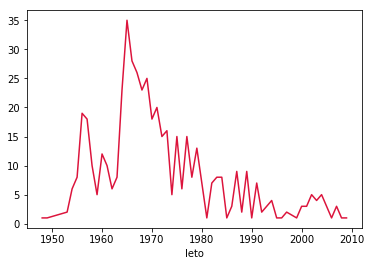

In [220]:
skladbe_po_letih.plot(y = "stevilo skladb", x = "leto",color = ["Crimson"])

Za še boljšo predstavo o razporeditvi skladb po desetletjih je spodaj prikazan tortni diagram. Razvidno je da skoraj 40% vseh pesmi pripada 60-im letom. Tukaj lahko tudi vidimo, da je delež skladb v 70-ih skoraj dvakrat večji kot v 50-ih, čeprav imajo 50-a leta na prejšnjem grafu višji vrh in bi po občutku lahko drugače sklepali. 

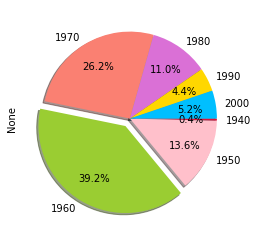

In [222]:
skladbe['desetletje'] = 10 * (skladbe.leto // 10)
colors = ["Crimson","Pink","YellowGreen","Salmon","Orchid","Gold","DeepSkyBlue"]
skladbe[skladbe.leto > 1930].groupby('desetletje').size().plot.pie(explode = (0, 0, 0.1, 0,0,0,0),
                                                                  shadow = True,autopct='%1.1f%%',pctdistance=0.7,
                                                                  counterclock = False,colors = colors)

## Izvajalci

Eno najpomembenjših vprašanj, ki se nam porajajo ob pogledu na lestvico je zagotovo kateri izvajalci so v tem prgledu popularne glasbe favorizirani. Graf, kjer je prikazanih prvih 10 izvajalcev po številu skladb, nam pove, kar smo po tihem tudi že pričakovali. Na prvem mestu mestu je z veliko prednostjo legendarna angleška skupina The Beatles, na lestvici imajo namreč uvrščenih kar 23 skladb. S po 13 skladbami jim sledi Skupina The Rolling Stones ter Bob Dylan. 

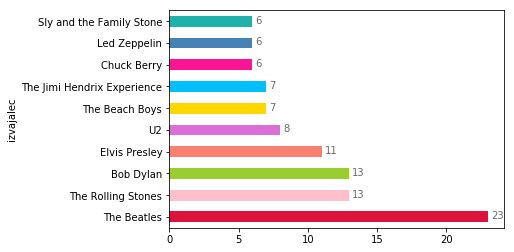

In [233]:
colors2 = colors + ["DeepPink","SteelBlue","LightSeaGreen"]
izvajalci = skladbe.groupby('izvajalec').size().sort_values(ascending = False)[0:10].plot.barh(colors = colors2)
for i in izvajalci.patches:
    izvajalci.text(i.get_width()+.2, i.get_y()+.15, \
            i.get_width(), fontsize=10, color='dimgrey')

## Avtorji

Če si ogledamo še najbolj popularne avtorje skladb. Pričakovano je na prvem mestu dvojec Lennon - McCartney, vodilna člana skupine The Beatles, ki sta napisala skoraj vse njihove skladbe. Drugo mesto si delita Keith Richards iz skupine Rolling Stones in Bob Dylan, takoj za njima pa je Mick Jagger, prav tako iz skupine Rolling Stones. Ugotovimo lahko, da so zadnji trije napisali več skladb, kot pa jih imajo sami uvrščeni na lestvico. Opazimo pa tudi, da na lestvici ni Elvisa Presleya, za katerega pa tudi vemo, da so zanj pisali različni avtorji. 

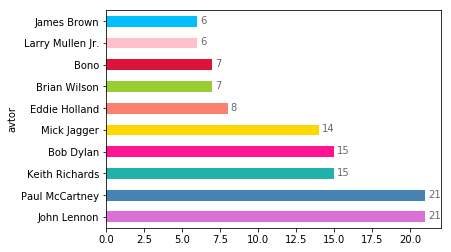

In [231]:
avtorji10 = avtorji.groupby("avtor").size().sort_values(ascending = False).head(10).plot.barh(colors = colors2)
for i in avtorji10.patches:
    avtorji10.text(i.get_width()+.2, i.get_y()+.15, \
            i.get_width(), fontsize=10, color='dimgrey')

## Založbe

Če se osredotočimo še na "business" v glasbeni industriji. Najprej si oglejmo najmogočnejše založbe. Na prvem je ameriška Columbia Records s 43-imi skladbami, sledi ji Capitol Records s 33-imi in Atlantic s še eno manj. 

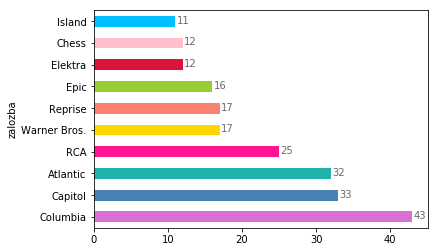

In [232]:
zalozbe = skladbe.groupby('zalozba').size().sort_values(ascending = False)[0:10].plot.barh(colors = colors2)
for i in zalozbe.patches:
    zalozbe.text(i.get_width()+.2, i.get_y()+.15, \
            i.get_width(), fontsize=10, color='dimgrey')

## Producenti

Kot vidimo iz spodnjega grafa, je daleč najuspešnejši producent George Martin. To mesto je dosegel po zaslugi skupine The Beatles, saj je produciral vse njihove skladbe na lestvici. 

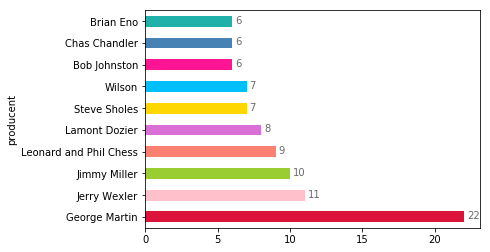

In [234]:
producenti10 = producenti.groupby("producent").size().sort_values(ascending = False).head(10).plot.barh(colors = colors2)
for i in producenti10.patches:
    producenti10.text(i.get_width()+.2, i.get_y()+.15, \
            i.get_width(), fontsize=10, color='dimgrey')

George_Martin = skladbe[skladbe.producent.str.contains("George Martin")]

## Billboard

Če si sedaj ogledamo še uvrstitve skladb na lestvici Billboard. Na spodnjem grafu je prikazana povezava med zaporednim mestom na naši lestvici ter številom tednov, ki jih je pesem preživela na Billboard lestvici. Opazimo, da povezave, najvišje število tednov imajo celo skladbe pri koncu lestvice. Podobno lahko vidimo tudi na drugem grafu, kjer je prikazno najvišje mesto na lestvici Billboard v odvisnosti od mesta na naši lestvici. Skozi celotno lestvico lahko opazimo bolj kot ne enakomerno porazdelitev, kar pomeni, da nista v korelaciji.

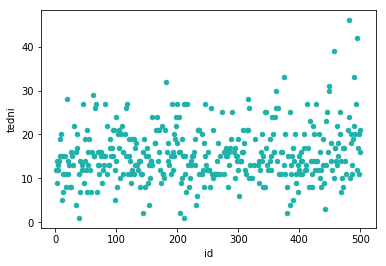

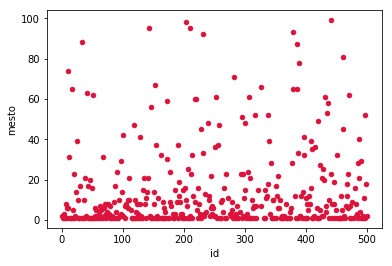

In [235]:
skladbe.plot.scatter("id","tedni", color = "LightSeaGreen")
skladbe.plot.scatter("id","mesto", color = "crimson")

V nasprotju s prejšnjima grafoma, pa lahko v naslednjem, kjer je prikazano najvišje mesto na lestvici v odvisnosti od tednov na lestvici, zasledimo povezavo. Večje število ugodnih mest je tako moč opaziti šele od desetega tedna naprej, medtem, ko so najslabša mesta skoncentrirana na območju, kjer so bile pesmi na lestvici le kakšen teden. To je seveda logično, če pomislimo kako poteka uvrščanje na lestvico. Ko pesem doseže svoj vrhunec, začne navadno polzeti po lestvici, torej če se je uvrstila na višje mesto, bo ta pot dlje časa trajala in pesem bo tako na lestvici ostala še kar nekaj časa.

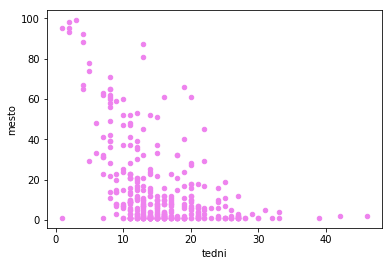

In [239]:
skladbe.plot.scatter("tedni","mesto", color = "Violet")

Zdaj si oglejmo še povprečno mesto na lestvici Billboard vsako leto. Ne opazimo nekega posebnega trenda. Najbolj izstopa leto 1995, ko je bila pesem na šele 65. mestu in temu primerno lestvici prebila le štiri tedne.

In [45]:
billboard_po_letih = skladbe[skladbe.mesto <= 1000].groupby("leto").mean().loc[:, 'tedni':'mesto']
billboard_po_letih.sort_values(by = ["mesto","tedni"],ascending = [False,True]).head(5)

,tedni,mesto
leto,,
1995,4.000000,65.000000
2004,24.600000,45.400000
2000,18.666667,37.666667
1986,12.000000,34.333333
1974,14.666667,25.000000


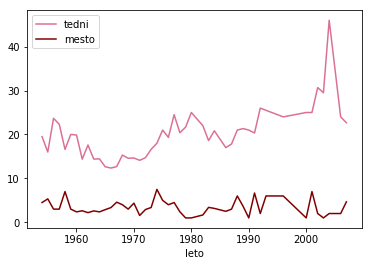

In [248]:
billboard_po_letih.plot(colors = ["PaleVioletRed", "Maroon"])

Če si ogledamo še razmerje mest na lestvici. Na prvem grafu si bom ogledali le skladbe, ki so dosegle vsaj deseto mesto na lestvici. Od teh jih je skoraj polovico zasedlo prvo mesto, sledita pa drugo in tretje. Na drugem pa so vse skladbe, vendar od desetega mesta spadajo v kategorijo others. Tudi tukaj lahko vidimo, da imajo skladbe uvrščene na prvo mesto zelo velik delež.

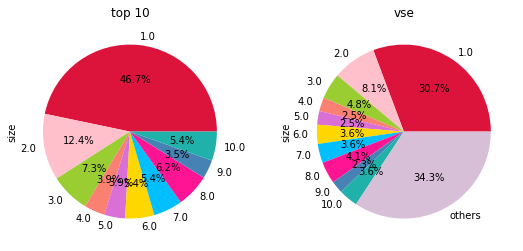

In [242]:
vse = skladbe[skladbe.mesto <= 1000].groupby(['mesto']).size().reset_index(name='size')
top10 = vse[:10].copy()
ostalo = pd.DataFrame(data = {
    'mesto' : ['others'],
    'size' : [vse['size'][10:].sum()]
})
vse2 = pd.concat([top10, ostalo])

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (9,4))
top10.plot(kind = 'pie', y = 'size', labels = top10['mesto'], ax = axes[0],autopct='%1.1f%%',
          colors = colors2).get_legend().remove()
vse2.plot(kind = 'pie', y = 'size', labels = vse2['mesto'], ax = axes[1],autopct='%1.1f%%',
         colors = colors2 + ["Thistle"]).get_legend().remove()
axes[0].set_title('top 10')
axes[1].set_title('vse')
plt.show()

V naslednjem grafu si lahko zopet ogledamo 10 najuspešnejši skladb gledet na mesto na lestvici Billboard. Tu lahko opazimo precej majhno število tednov v 60-ih letih, kar pa je popolnoma smiselno. V tem obdobju je bilo namreč največ skladb in posledično niso mogle biti vsaka zelo dolgo na lestvici. 

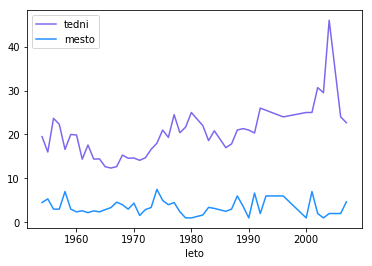

In [249]:
billboard10 = skladbe[skladbe.mesto <= 10].groupby("leto").mean().loc[:, 'tedni':'mesto']
billboard10.plot(colors = ["MediumSlateBlue","DodgerBlue"])

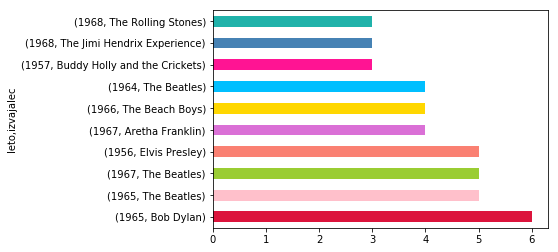

In [250]:
skladbe_leto_izvajalec = skladbe.groupby(['leto',"izvajalec"]).size().sort_values(ascending = False).head(10)
skladbe_leto_izvajalec.plot.barh(colors = colors2)

In [213]:
Bob_Dylan = skladbe[skladbe.izvajalec.str.contains("Bob Dylan")].groupby("leto").size()
The_Beatles = skladbe[skladbe.izvajalec.str.contains("The Beatles")].groupby("leto").size()
The_Rolling_Stones = skladbe[skladbe.izvajalec.str.contains("The Rolling Stones")].groupby("leto").size()

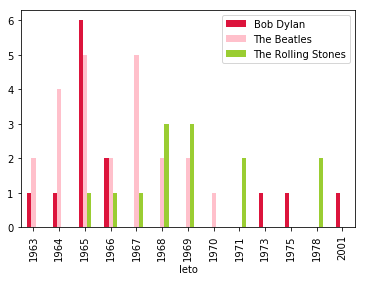

In [251]:
zdr = pd.concat([Bob_Dylan, The_Beatles,The_Rolling_Stones], axis=1, sort=False).rename(index=str, 
                            columns={0: "Bob Dylan", 1: "The Beatles", 2:"The Rolling Stones"})
zdr.plot.bar(colors = colors2)

## Zaključek

Če zaključimo ......